<a href="https://colab.research.google.com/github/gukouk176-debug/colab2/blob/main/DataScience_15_ipynb_json.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第15回講義 画像分類
### CIFAR10によるCNN分類


## 全講義共通初期設定
+ 警告の非表示(実装時は非推奨)
+ numpy pandas小数点以下桁数の表示設定
+ pandas全データ表示設定
+ Google driveへの接続

In [1]:
# ワーニングを非表示にする
# この設定は不都合が見えなくなる為、お勧めしない
# 今回は教育資料用に、出力を簡素化する為に利用する
import warnings
warnings.simplefilter('ignore')

# モジュールの読み込み
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 小数点以下桁数の表示設定
np.set_printoptions(precision = 3)
pd.options.display.precision = 3

# pandasの全データ表示設定
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
#google driveに接続
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
#google driveと接続できたかを確認
!ls drive/MyDrive/DataScience

'3(00000).txt'	'3(00004).txt'		       imports-85.csv	   wine.csv
'3(00001).txt'	 breast-cancer-wisconsin.csv   iris.csv		   ファイル_000
'3(00002).txt'	 example.xlsx		       titanic_train.csv
'3(00003).txt'	 img			      'wine 2.csv'


## cifar10のデータセットの分類
airplane（飛行機）
automobile（自動車）
bird(鳥)
cat(猫)
dog(犬)
deer（鹿）
frog(蛙)
horse(馬)
ship(船)
truck(トラック)
の10種類の画像データが6万枚存在するデータセット
###この10種類について分類してみる

###データセットの読み込み方（ライブラリからダウンロード）

In [4]:
#データセットのダウンロード方法その(ライブラリから直接データセットをダウンロード)
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


###トレーニング用のデータセットの確認（1つの変数に32×32の画像が5万枚）

In [5]:
#データセットの確認
X_train.shape

(50000, 32, 32, 3)

In [6]:
# ラベルの確認
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

### cifar10の画像の一部表示

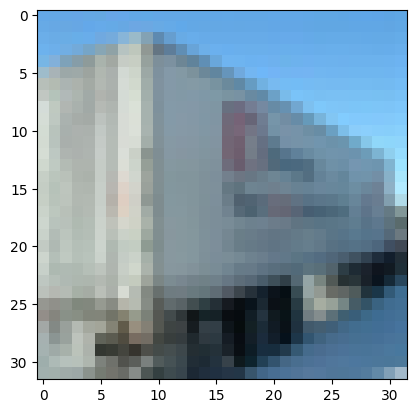

In [7]:
# 画像表示
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

plt.imshow(X_train[15])
plt.show()

###cifar10のラベル名作成とそれぞれの画像表示

In [8]:
#cifar10のラベル作成
import matplotlib.pyplot as plt

# ラベル作成(10種類)
cifar10_label = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']


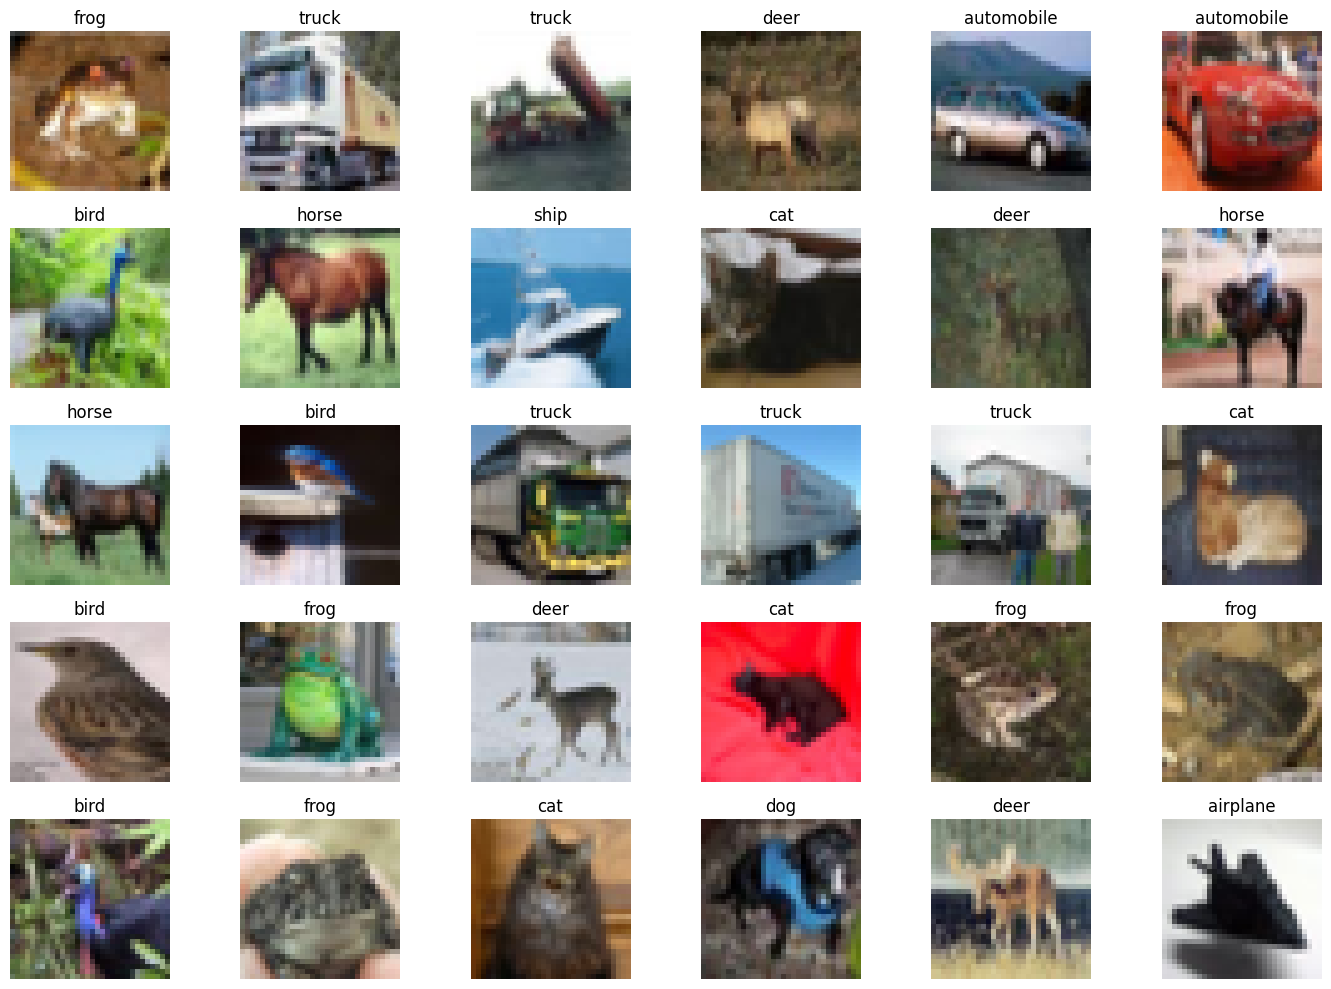

In [9]:
#画像の表示
for i,img in enumerate(X_train[:30]):
    plt.rcParams["figure.figsize"] = (15, 10)
    plt.subplot(5, 6, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(cifar10_label[y_train[i][0]])
    plt.tight_layout()

plt.show()

###ラベルのベクトル化

In [10]:
#from keras.utils import np_utils
from tensorflow.python.keras.utils.np_utils import to_categorical

# クラスラベルのベクトル化
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [11]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

###トレーニングデータとテストデータのデータ型の変更と正規化

In [12]:
# データの型の変更と正規化
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train/255
X_test = X_test/255

###CNNによる学習(正解率と損失の曲線表示)

In [13]:
# 学習中の正解率と損失を描くためのライブラリをインストール
!pip install livelossplot

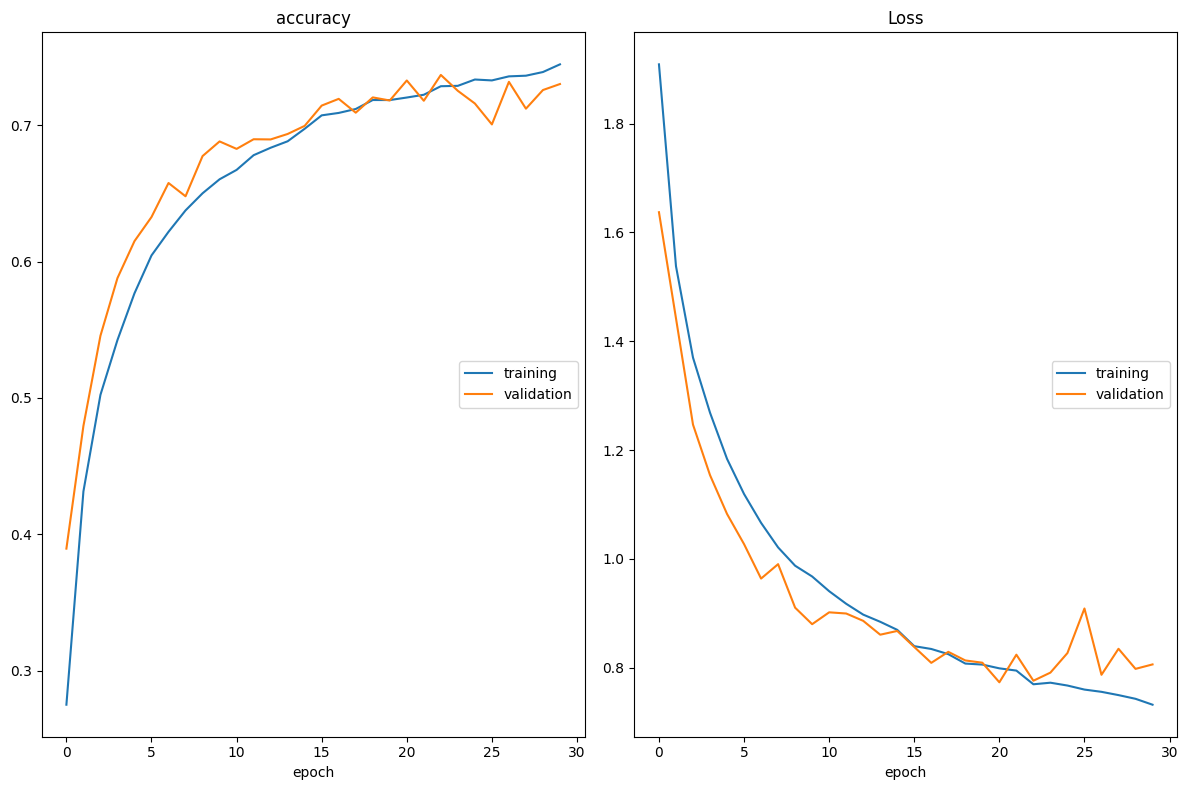

accuracy
	training         	 (min:    0.275, max:    0.744, cur:    0.744)
	validation       	 (min:    0.390, max:    0.737, cur:    0.730)
Loss
	training         	 (min:    0.732, max:    1.909, cur:    0.732)
	validation       	 (min:    0.773, max:    1.637, cur:    0.806)
547/547 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7489 - loss: 0.7174 - val_accuracy: 0.7301 - val_loss: 0.8059


In [14]:
#CNNによる学習
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
#from keras.optimizers import Adam
from keras.layers import Dense, Activation, Dropout, Flatten
from tensorflow.python.keras.callbacks import TensorBoard
from livelossplot import PlotLossesKeras

# モデルを宣言
model=Sequential()

# small cnnを構築
model.add(Conv2D(16,(5,5),padding='same',input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(Conv2D(16,(5,5),padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(32,(5,5),padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(32,(5,5),padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(64,(5,5),padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64,(5,5),padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

# 平坦化：1次元ベクトルに変換
model.add(Flatten())

#全結合層
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#10クラスの出力層
model.add(Dense(10,activation='softmax'))

#モデルのコンパイル
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# TensorBoardで結果を見るためのインスタンス化
#tsb = TensorBoard(log_dir='logs/fit')

# 学習
history = model.fit(
    X_train,            #トレーニングデータ
    y_train,            #トレーニングデータのラベル
    batch_size=64,       #バッチサイズ：1回に計算するデータの数のこと。大きいとメモリ使用量にダイレクトに響く
    epochs=30,           #エポック数：繰り返し回数
    validation_split=0.3,           #バリデーションデータの割合
    callbacks=[PlotLossesKeras()]  #学習曲線の表示
)

###テストデータを用いたモデルの精度検証

In [15]:
#テストデータによるモデルの分類
#テストデータ10000枚中の正解率表示
evaluated_value = model.evaluate(X_test,y_test)
print('正解率：',evaluated_value[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7259 - loss: 0.8438
正解率： 0.7221999764442444


###モデルとその重みの保存（jsonファイルとhdf5ファイル）

In [16]:
#モデルと重みの保存
#モデルをjsonファイルに保存する
model_json = model.to_json()
with open("/content/drive/MyDrive/DataScience/model.json", mode='w') as f:
  f.write(model_json)

# 学習済みの重みをhdf5ファイルに保存する
model.save_weights("/content/drive/MyDrive/DataScience/weights.hdf5")

ValueError: The filename must end in `.weights.h5`. Received: filepath=/content/drive/MyDrive/DataScience/weights.hdf5

###保存したモデルと重みのロードの仕方

In [17]:
#モデルのロード
from keras.models import model_from_json

#空のモデル作成
model2 = None

#モデルのjsonファイル読み込み
with open("./drive/My Drive/DataScience/model.json") as f:
  model2 = model_from_json(f.read())

#重みのロード
model2.load_weights("/content/drive/MyDrive/DataScience/weights.hdf5")


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/content/drive/MyDrive/DataScience/weights.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

###ロードしたモデルを使ってテストデータによる結果の精度検証

In [18]:
# テストデータに対する分類結果
predict = model2.predict(X_test)
predict

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


array([[0.101, 0.097, 0.097, ..., 0.102, 0.098, 0.098],
       [0.102, 0.095, 0.096, ..., 0.1  , 0.098, 0.097],
       [0.102, 0.095, 0.097, ..., 0.1  , 0.098, 0.098],
       ...,
       [0.101, 0.097, 0.097, ..., 0.102, 0.099, 0.098],
       [0.102, 0.097, 0.096, ..., 0.101, 0.097, 0.098],
       [0.101, 0.097, 0.097, ..., 0.1  , 0.099, 0.098]], dtype=float32)

In [19]:
#精度の検証結果（正解率）
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

evaluated_value2 = model2.evaluate(X_test,y_test)
print('正解率：',evaluated_value2[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.0968 - loss: 2.3040
正解率： 0.09570000320672989
